# Analyzing Color with Python

Just as we can process text data with Python, so too can we process image data. This workshop offers an introduction to image processing with Python, focusing in particular on processing color data in images using Python. We'll start by looking at some prior art in color analysis within the Digital Humanities. We'll then discuss the ways humans and machines perceive color. Finally, we'll roll up our sleeves and try some color analysis of our own!

## Prior Art in Color Analysis

Within the Digital Humanities, researchers have used color analysis for a number of projects related to art history and visual culture. Here are a few sample projects that show the kinds of work being done with color analysis:
  
#### Analysis of New Yorker Covers

Nicholas Rougeux has produced [a number of beautiful visualizations and posters](https://www.c82.net/work/) that visualize the color patterns in historic books, including the following project that analyzes the covers of The New Yorker over time:

<img src='./images/new-yorker-covers.png' style='width: 600px; margin: 20px auto'>

In [his take on New Yorker Covers](https://www.c82.net/blog/?id=74), he identifies the chief colors of a sample of New Yorker covers, and transforms each into a Mondrian-esque painting.

#### A Viz of Fire and Ice

Fred Hohman, Sandeep Soni, Ian Stewart, and John Stasko teamed up to [analyze color patterns in Game of Thrones](https://fredhohman.com/a-viz-of-ice-and-fire/), producing interactive visualizations such as the following:

<img src='./images/fire-and-ice.png' style='width: 600px; margin: 20px auto'>

The plot above shows the dominant colors from a particular episode of Game of Thrones, which we can see is dominated by muted blue tones.
  
#### Runway Palette

In their project [Runway Palette](https://artsexperiments.withgoogle.com/runwaypalette#), Google Arts and Culture created a stunning interface that allows users to search through fashion designs using color palettes:

<img src='./images/runway-palette.png' style='width: 600px; margin: 20px auto'>

By interacting with a large map that shows all color combinations, users can scan thousands of fashion photographs and analyze the colors present in each.

## Getting Started: Human Perceptions of Color

When talking about color, it's important to keep in mind that people perceive color differently, and that the human visual system attempts to take surrounding context into account, which while helpful overall, sometimes leads to misperceptions or optical illusions. Lighting conditions, an object's proximity to other objects, the size of the object, and (for digital objects) a screen's resolution all play a role in how we color that object.

Let's look at some examples.

#### "The Dress"
<img style='width: 300px' src='./images/dress.png'>
<div style='text-align: center; margin: 10px 0; font-family: arial; font-size: 14px;'>Remember <a href='https://en.wikipedia.org/wiki/The_dress' target='_blank'>this debate</a> from 2015? Do you see a blue/black or white/gold dress?</div>

#### Checkerboard Squares 
<img style='width: 400px' src='./images/checkerboard.png'>
<div style='text-align: center; margin: 10px 0; font-family: arial; font-size: 14px;'>Edward Adelson's <a href='https://www.illusionsindex.org/ir/checkershadow' target='_blank'>checker shadow illusion</a> is a popular optical illusion that shows <br/> the effects of perceived shadows. Squares A and B are actually the same shade of gray!</div>

#### Data Visualizations 
<img style='width: 400px' src='./images/plot-colors-1.png'>
<div style='text-align: center; margin: 10px 0; font-family: arial; font-size: 14px;'>How many categories do you see?</div>

<img style='width: 400px' src='./images/plot-colors-2.png'>
<div style='text-align: center; margin: 10px 0; font-family: arial; font-size: 14px;'>How many categories do you see now, if we enlarge the circles?</div>

<img style='width: 400px' src='./images/plot-colors-3.png'>
<div style='text-align: center; margin: 10px 0; font-family: arial; font-size: 14px;'>How many categories do you see if we switch to a bar chart?<br /> For more on how the size, shape, and proximity of marks affect <br/> our perception of their color, check out <a href='https://danielleszafir.com/colordiff_vis2017.pdf' target='_blank'>Danielle Albers Szafir's paper</a>.</div>

#### Color Blindness
<img style='width: 400px' src='./images/traffic-palette.png'>
<div style='text-align: center; margin: 10px 0; font-family: arial; font-size: 14px;'>There are different types of color blindness you should consider when designing a <br/> data visualization—especially one that is color centric! For a great list of tools and <br/> tips, read <a href='https://thedesignteam.io/about-being-colorblind-bc0a58bcdfc2' target='_blank'>"The Colorblind Designer"</a> by Pablo Stanley and the Design Team.</div>

## Computer Perceptions of Color

As we'll discuss in more detail more shortly, there are different ways that a computer can "see" color. When embarking on a color extraction project, you'll want to think carefully about what colors or patterns you want captured. Will you combine different shades of blue into one aggregate blue bucket? Do you want to extract only the top (in terms of quantity) colors, even though that might miss important—to the human eye—pinpricks of color?   

Additionally, you'll want to think about how you might highlight the choices you've made and the ensuing results to viewers. Here are two examples from <a href='https://dhlab.yale.edu/projects/blaketint/' target='_blank'>*BlakeTint*</a>, a collaboration between the Digital Humanities Lab and Yale graduate student Sarah Weston that visualizes Wiliam Blake's use of color over his career.

<img style='width: 800px' src='./images/color-representation.png'>
<div style='text-align: center; font-family: arial; font-size: 14px;'>Each column in the above image represents one plate in a Blake manuscript. One early conversation we had was how <br/> we wanted to represent the distribution of colors in each plate. A proportional view better illustrates the quantity of each <br/> color in Blake's plate, whereas an equally sized representation shows the full range of colors that are present.</div>

<img style='width: 600px' src='./images/blake-image.png'>
<div style='text-align: center; margin: 10px 0; font-family: arial; font-size: 14px;'>Another consideration we had to make was whether to subtract out <br/> the color of the paper before we asked the computer to generate the palettes.</div>

## First Steps with Computer Vision

Now that we've seen some of the things that are possible with color analysis, let's get started with some computer vision of our own. The first step in any computer vision project is to read in image files. There are several ways to accomplish this task, but we'll use Keras, which we can install (along with all other modules we'll need) by running the following command:

In [1]:
!pip install -r requirements.txt

After we've installed Keras, we can use the library to read an image into memory as follows:

In [2]:
from keras.preprocessing.image import load_img, img_to_array

# load the image
im = load_img('nemo.jpg')

Great! Just as it's often helpful to print text data while processing text collections, it's also usually helpful to display image data while processing image collections. Let's practice visualizing our image with the following:

<IPython.core.display.Javascript object>


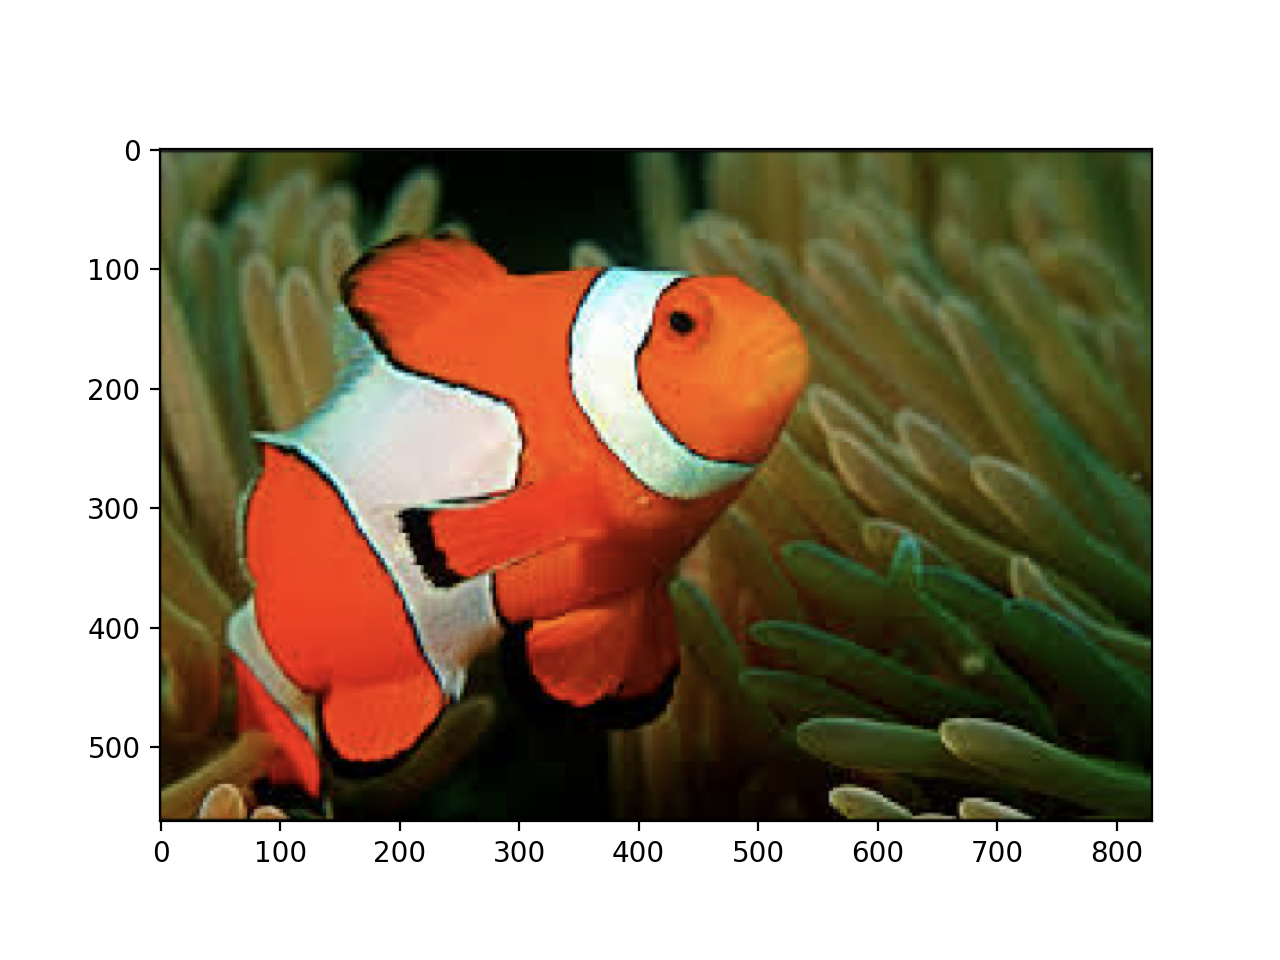

In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt

# convert the image type to an array
arr = img_to_array(im).astype('uint8')

# show the image array
plt.imshow(arr)

The first line in the block above tells the Jupyter/Colab notebook that we want to display visualizations inside the notebook. That line only needs to be run once in a notebook. Then we import the `matplotlib` library's `pyplot` component and alias that module component to the name `plt` (following convention). The next line is a little more interesting. There we convert our image object to an "array" (essentially a fancy word for a "list"). Furthermore, we specify that we want that array to be comprised of the data type "uint8". We'll dive more deeply into data types below, but for now let's just plan to transform all images to this datatype. Finally we display the image!

<h2 style='color: green'>Reviewing Image Reading</h2>

Let's practice reading images into memory so you can start to develop some muscle memory around this fundamental task in computer vision. Try to read in and then display the image "turtle.jpg" below:

In [ ]:
# type your code here

<details>
  <summary>Solution</summary>
  We can accomplish this task with the following lines:
      
  ```
  from keras.preprocessing.image import load_img, img_to_array
  import matplotlib.pyplot as plt
      
  # load the image
  im = load_img('turtle.jpg')
  
  # convert the image type to an array
  arr = img_to_array(im).astype('uint8')

  # show the image array
  plt.imshow(arr)
  ```
</details>

## Analyzing Arrays

In the code above, we used the function `img_to_array()` to convert our image object into an array. As it turns out, arrays are the fundamental data type we'll use when processing images, so it's worth spending some time to understand the nature of arrays. Let's start with some of the most useful methods we can call on arrays:

####  `.shape` to get an array's width, height, and color channels

We can think of arrays like Excel spreadsheets. An Excel spreadsheet has a certain number of rows and columns. We could think of the "height" of the spreadsheet as the number of rows it contains, and we could think of the "width" of that spreadsheet as the number of columns it contains.

Likewise, a (2+ dimensional) array in Python has a certain number of rows and columns. The number of rows indicates the array's height, and the number of columns indicates the array's width.

We can determine the number of rows and columns in our arrays by accessing the `.shape` attribute on an array:

In [4]:
# read in an image
im = load_img('nemo.jpg')

# convert the image type to an array
arr = img_to_array(im).astype('uint8')

# obtain the shape of the array
arr.shape

(562, 830, 3)

This `.shape` attribute indicates that our nemo image is 562 pixels tall and 830 pixels wide. If you open the image with a photo editing app like Photoshop you can verify those numbers are correct.

You'll notice that there is a third number returned by `.shape`. That number (3) indicates the number of "color channels" in the image. There are 3 color channels in our nemo image, corresponding to the amount of red, green, and blue (respecively) in each pixel. We will come to understand this color channel information as we explore array iteration below.

To reiterate the meaning of our image shape a little more formally, we can say that our image represented in `arr` contains 562 rows, each containing 830 columns, each containing 3 color values (rgb). We can think of this image as a list (rows) in which each element is a list (column) wherein there are 3 color values (rgb). Each of those rgb values is an integer from 0 to 255, with 0 indicating no color at all and 255 indicating full color (either full red, or full green, or full blue). In short that's all there is to image arrays!

#### `[n]` to access a row of pixels

We can access a particular row of an array with the standard Python "slice" notation:

In [5]:
# read in an image
im = load_img('nemo.jpg')

# convert the image type to an array
arr = img_to_array(im).astype('uint8')

# access the 200th row from our image
arr[200]

array([[ 39,  37,  22],
       [102,  94,  54],
       [114, 105,  60],
       ...,
       [ 62,  63,  15],
       [ 62,  63,  15],
       [ 61,  64,  15]], dtype=uint8)

The method above will acces the 200th row of pixels in our image. **The "origin" of image arrays is the top left corner**, so the 0-th row is the top row of the image, and in the case of our clown fish, the 561th row is the bottom row of the image. 

In the output above, we can see the numeric content contained in that row. Jupyter/Colab truncates the display of that row, but if we ask for the `.shape` of the row we can verify the row contains 830 units (the width of our image) each with 3 color channels:

In [6]:
arr[200].shape

(830, 3)

To make sure we understand that this row corresponds to a single row from our image, we can visualize the row of pixels with the following:

<IPython.core.display.Javascript object>


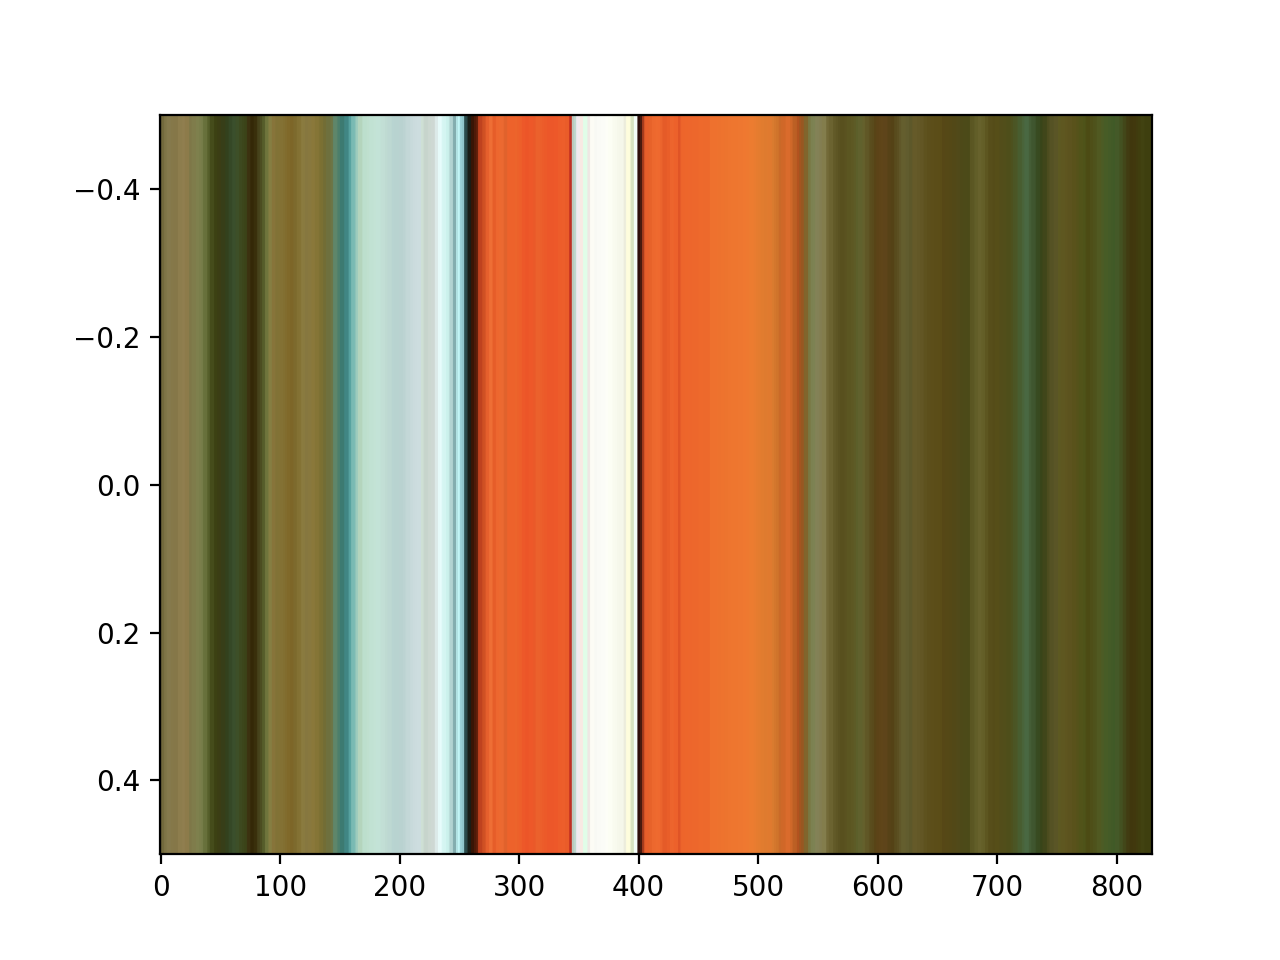

In [7]:
# start a new plot
plt.figure()

# obtain the row we want to visualize
row = arr[200]

# show the row -- interpolation='nearest' and aspect='auto' expand the row vertically to make it easier to see
# try removing those lines and you'll see the plot shows a literal pixel of height for the row, which is hard
# to analyze!
plt.imshow([row], interpolation='nearest', aspect='auto')

We can see that this row of the image contains some of the orange from our clown fish, and some of the surrounding browns and blues of the ocean landscape. 

#### `[n][k]` to access a single pixel

We noted above that `arr[n]` lets us access the nth row of an image. Likewise, we can access a particular pixel in our image by taking a slice from a row:

In [8]:
# read in an image
im = load_img('nemo.jpg')

# convert the image type to an array
arr = img_to_array(im).astype('uint8')

# access the 200th row, then access the pixel in column number 400 within that row
arr[200][450]

array([237, 104,  44], dtype=uint8)

In the last line above, we access the 200th row, then access the 450th pixel in that row. **The origin of image arrays is the top left corner**, so the 200th row is about 2/5 the way down our image from the top, and the 450th column is just to the right of the midpoint of our image.

As we can see, this pixel contains 3 units, which correspond to the amount of red, green, and blue (respectively) in that pixel. Let's examine this pixel below:

<IPython.core.display.Javascript object>


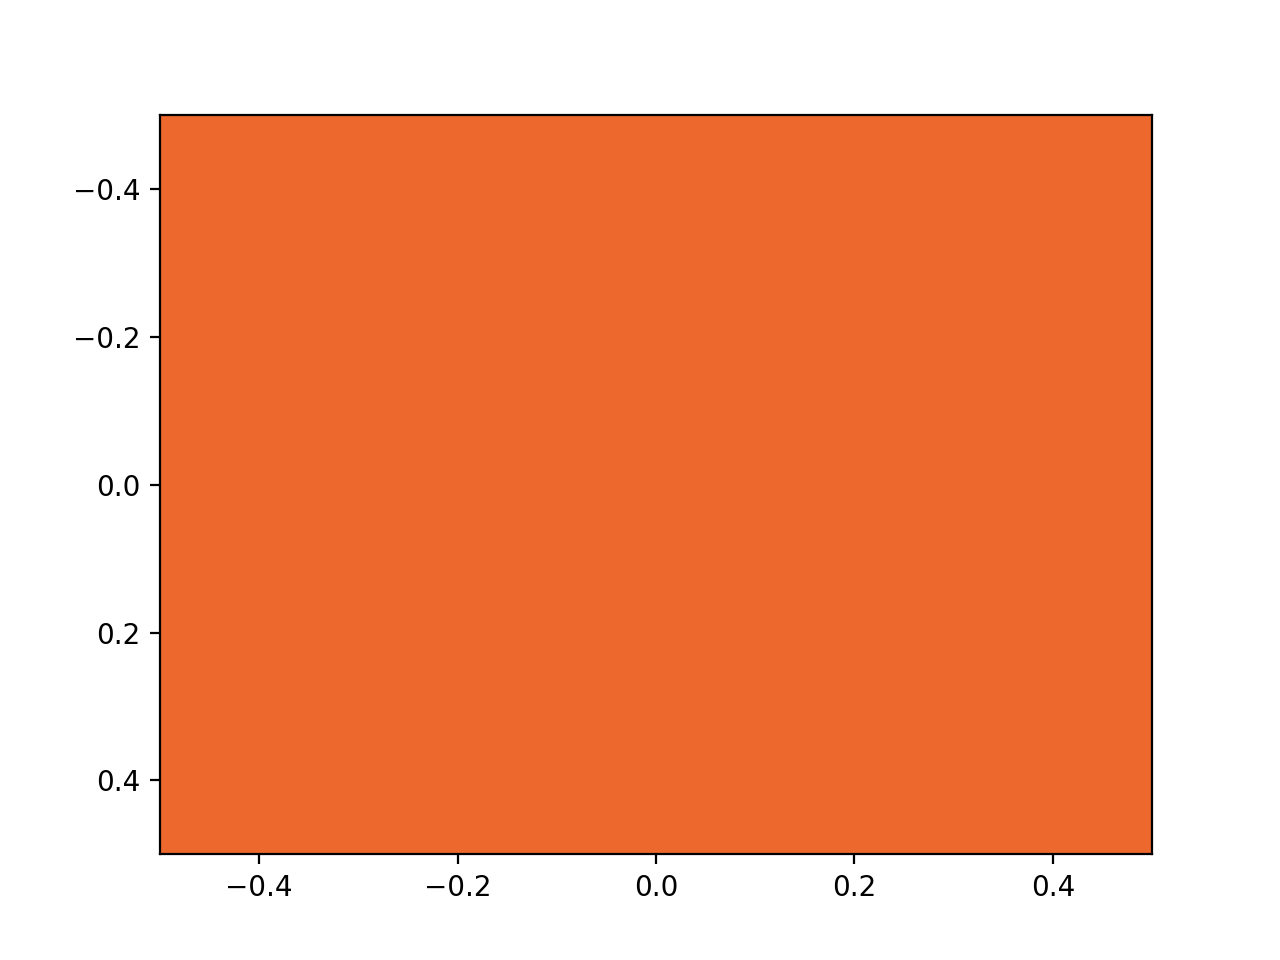

In [9]:
# access the 200th row, then access the pixel in column number 450 within that row
pixel = arr[200][450]

# create a new plot
plt.figure()

# show the pixel. Once again, the interpolation and aspect arguments expand the size of the pixel
# to make the pixel easier to see
plt.imshow([[pixel]], interpolation='nearest', aspect='auto')

When we analyze the color in images, we're analyzing each pixel in the image. And now we know how to access individual pixels!

<h2 style='color: green'>Reviewing Arrays</h2>

See if you can read in `turtle.jpg` and plot a single green pixel from that image. 

Hint: Consider that the bottom right hand corner is full of green pixels. How can you use the slice notation we used above to find a pixel that's close to the bottom right hand corner of the image?

In [ ]:
# type your code here

<details>
  <summary>Solution</summary>
  We know that we can read our image into memory with the following lines:
      
  ```
  from keras.preprocessing.image import load_img, img_to_array
  import matplotlib.pyplot as plt
      
  # load the image
  im = load_img('turtle.jpg')
  
  # convert the image type to an array
  arr = img_to_array(im).astype('uint8')
  ```
  
  Next we will want to know the dimensions of our image, which we can access with `.shape`:
    
  ```
  # investigate the shape of the image
  arr.shape
  ```
  
  This returns (543, 603, 3), which indicates our image has 543 rows, each with 603 columns, each with 3 color channels. From there we can pick a row close to the bottom of our image:
    
  ```
  # select a row toward the bottom of the image
  row = arr[540]
  ```
    
  And from there we can access a pixel close to the right-hand side of the row:
    
  ```
  # select a particular pixel from one of the final columns in our row
  pixel = arr[540][600]
  ```
    
  If we want to visualize our selected pixel, we can do so with the following:
    
  ```
  # start a new plot
  plt.figure()
    
  # plot the pixel
  plt.imshow([[pixel]], interpolation='nearest', aspect='auto')    
  ```
  
</details>

# Analyzing Color Spaces

In the section above, we learned how to access individual pixels within an image. We said that each of those pixels has three components, corresponding to the amount of red, green, and blue in the pixel. Let's revisit that idea so we can prepare to understand how projects like Google's Runway Palette identify the dominant colors within an image.

Let's look at a sample pixel from our sample image:

In [10]:
%matplotlib notebook

from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# read in an image
im = load_img('nemo.jpg')

# convert the image type to an array
arr = img_to_array(im).astype('uint8')

# access the 200th row, then access the pixel in column number 450 within that row
pixel = arr[200][450]

print(pixel)

[237 104  44]


We can see that the red component of this pixel is 237, the green component of the pixel is 104, and the blue component of the pixel is 44. The red value is much larger than the green or blue values, so the pixel appears more red than green or blue:

<IPython.core.display.Javascript object>


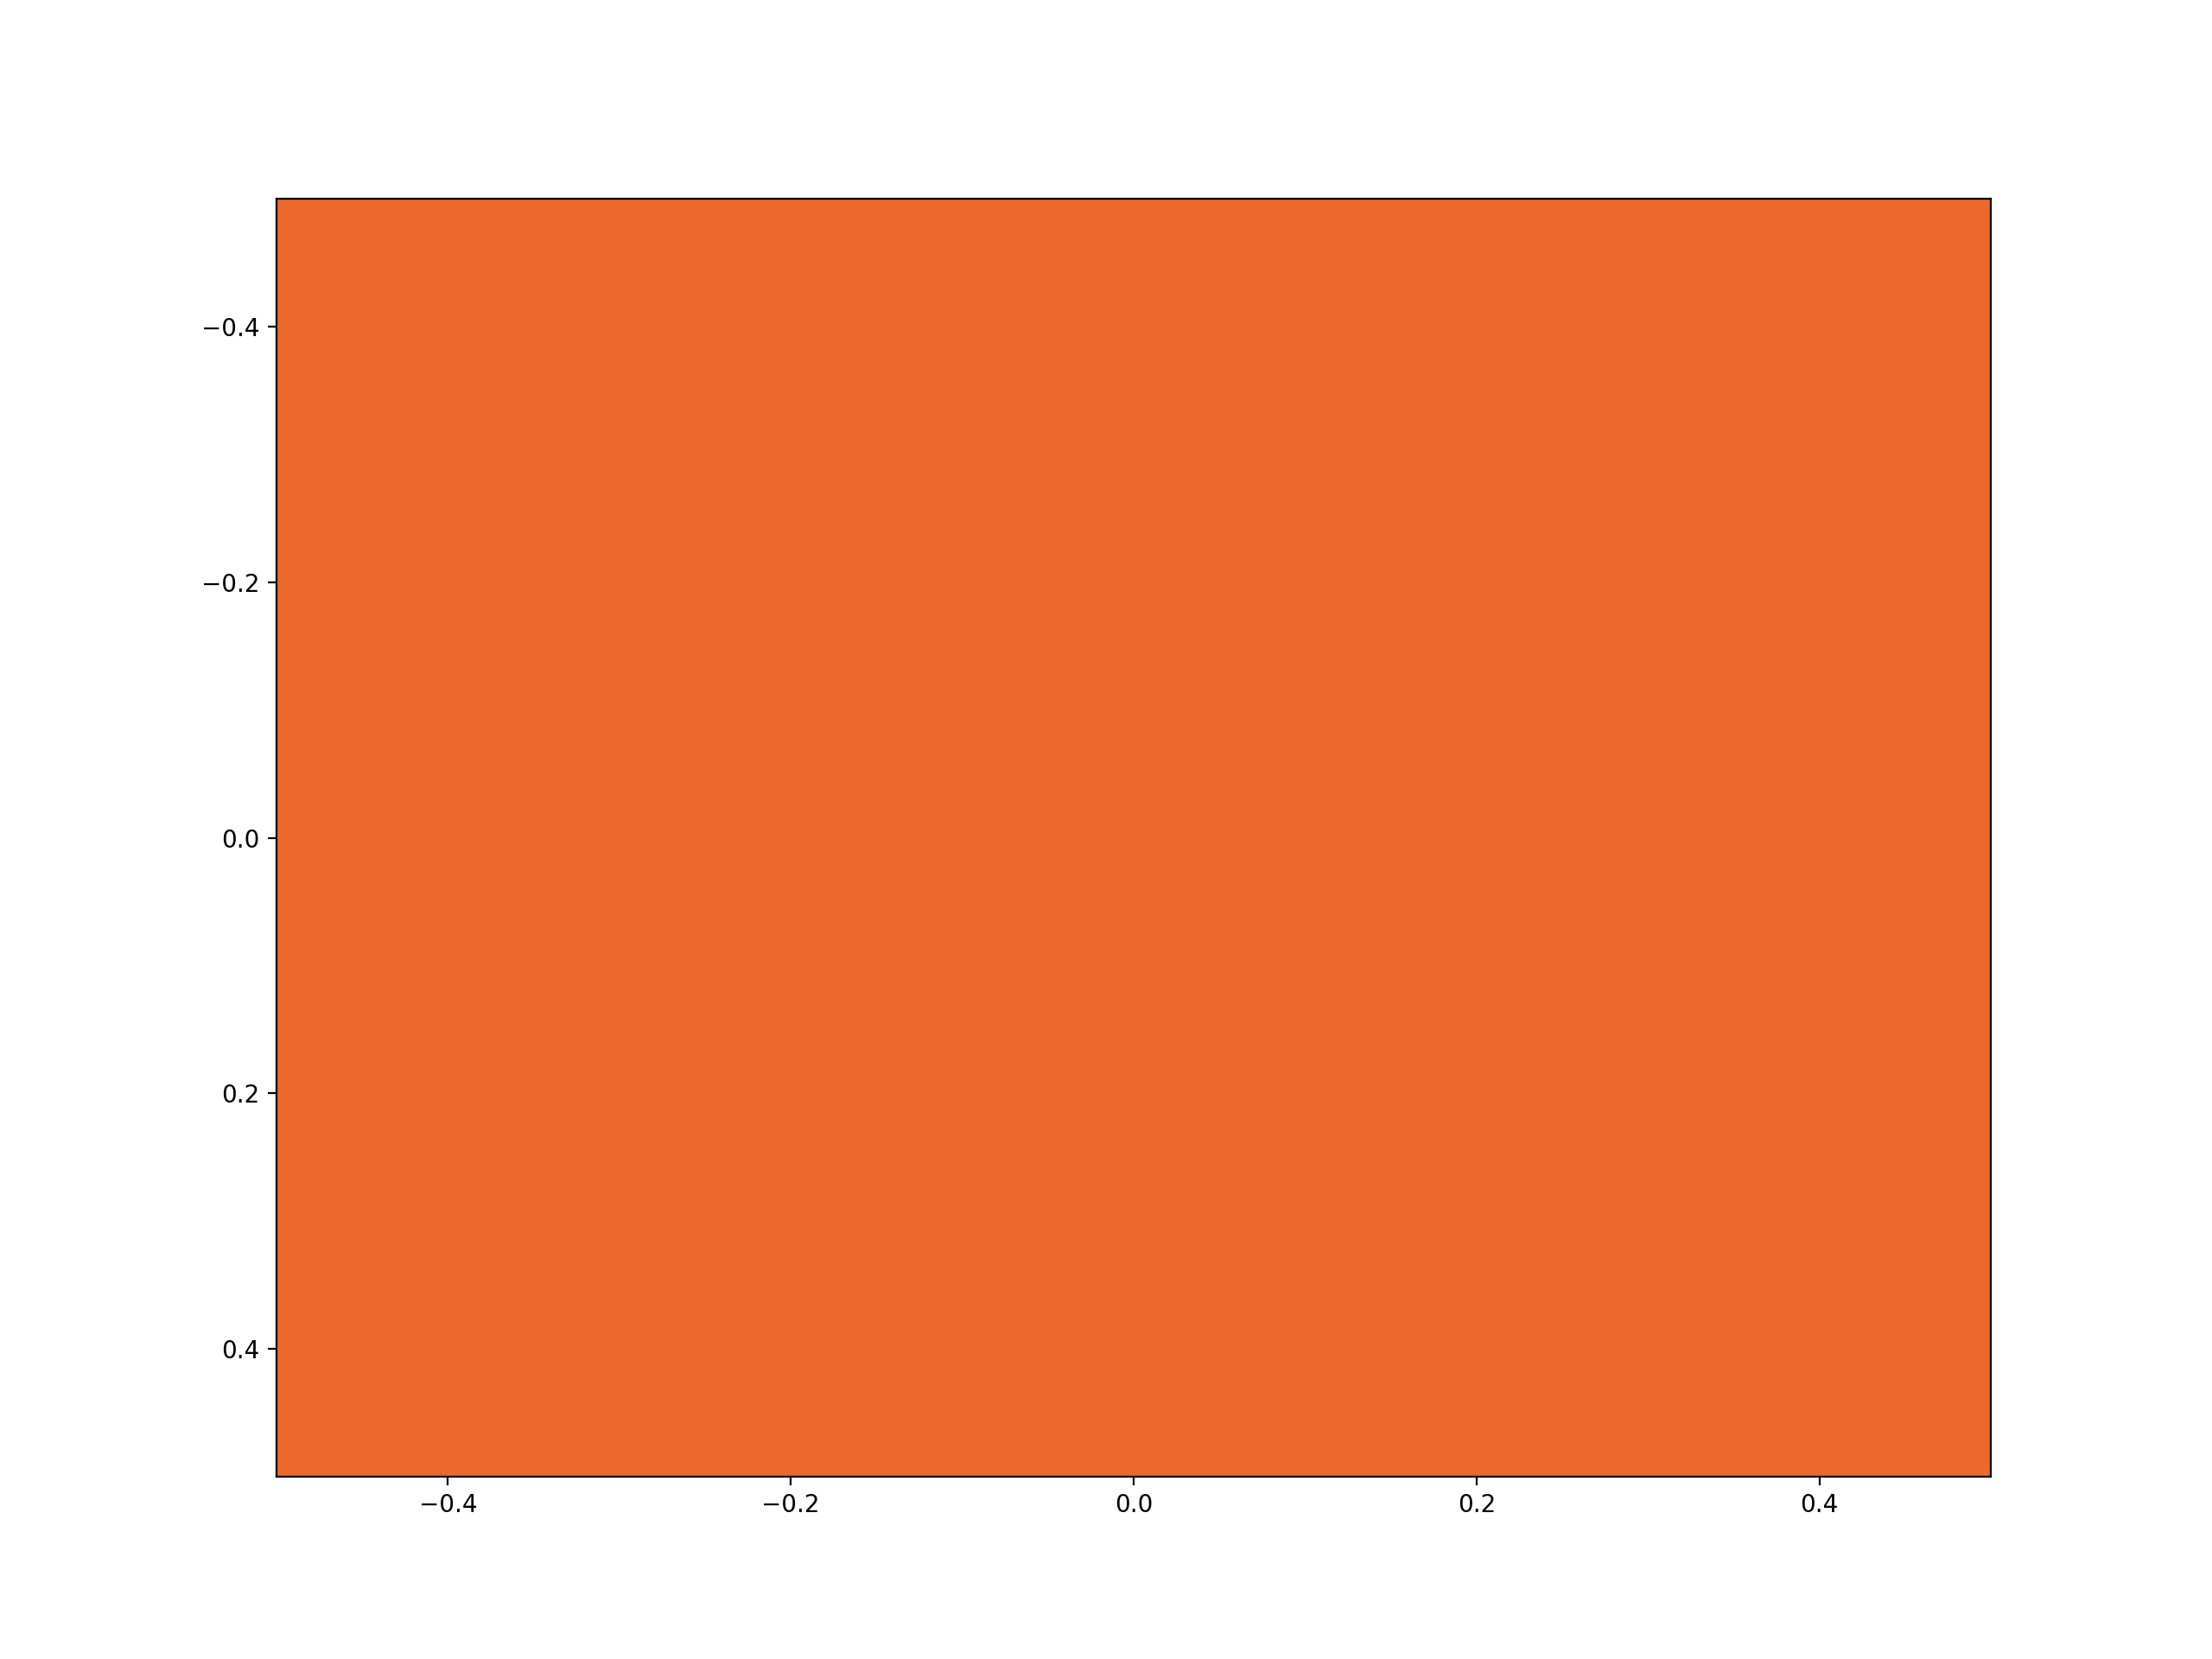

In [11]:
# create a new plot
plt.figure()

# show the pixel
plt.imshow([[pixel]], interpolation='nearest', aspect='auto')

Let's now use those red, green, and blue color components to position this pixel in a 3D space:

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


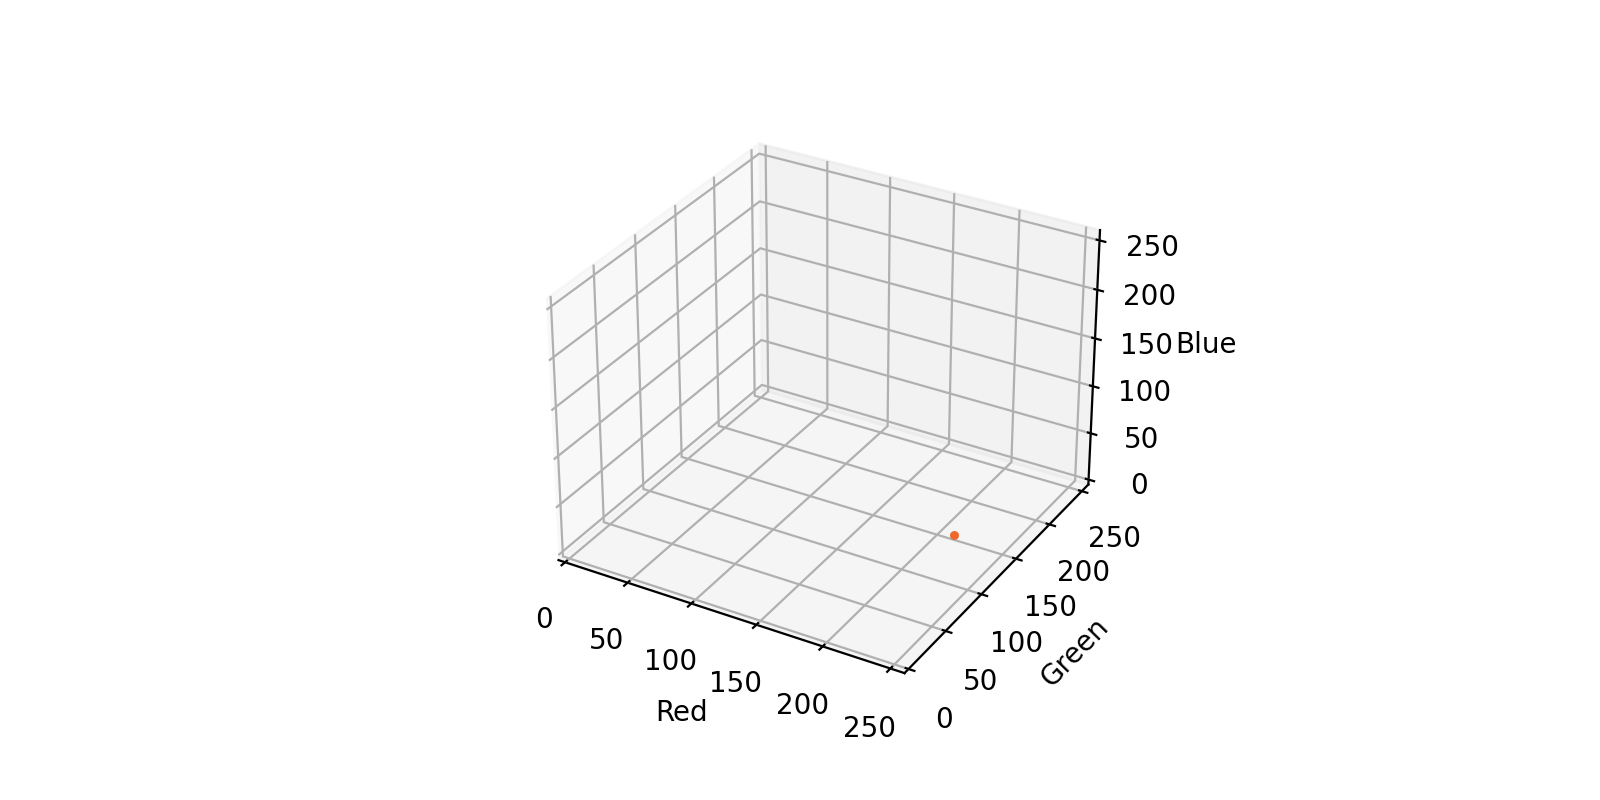

In [15]:
%load_ext autoreload
%autoreload 2

# import some helper code for creating 3d plots
import helpers

# plot our pixel
helpers.plot_points_3d([[pixel]])

Looking at this plot, one can see that our pixel--which has RGB components [237 104  44]--appears quite high on the Red axis, a moderate distance on the Green axis, and rather low on the Blue axis. This is because the pixel has lots of red, little green, and less blue.

Let's now plot all of the pixels from our image:

<IPython.core.display.Javascript object>


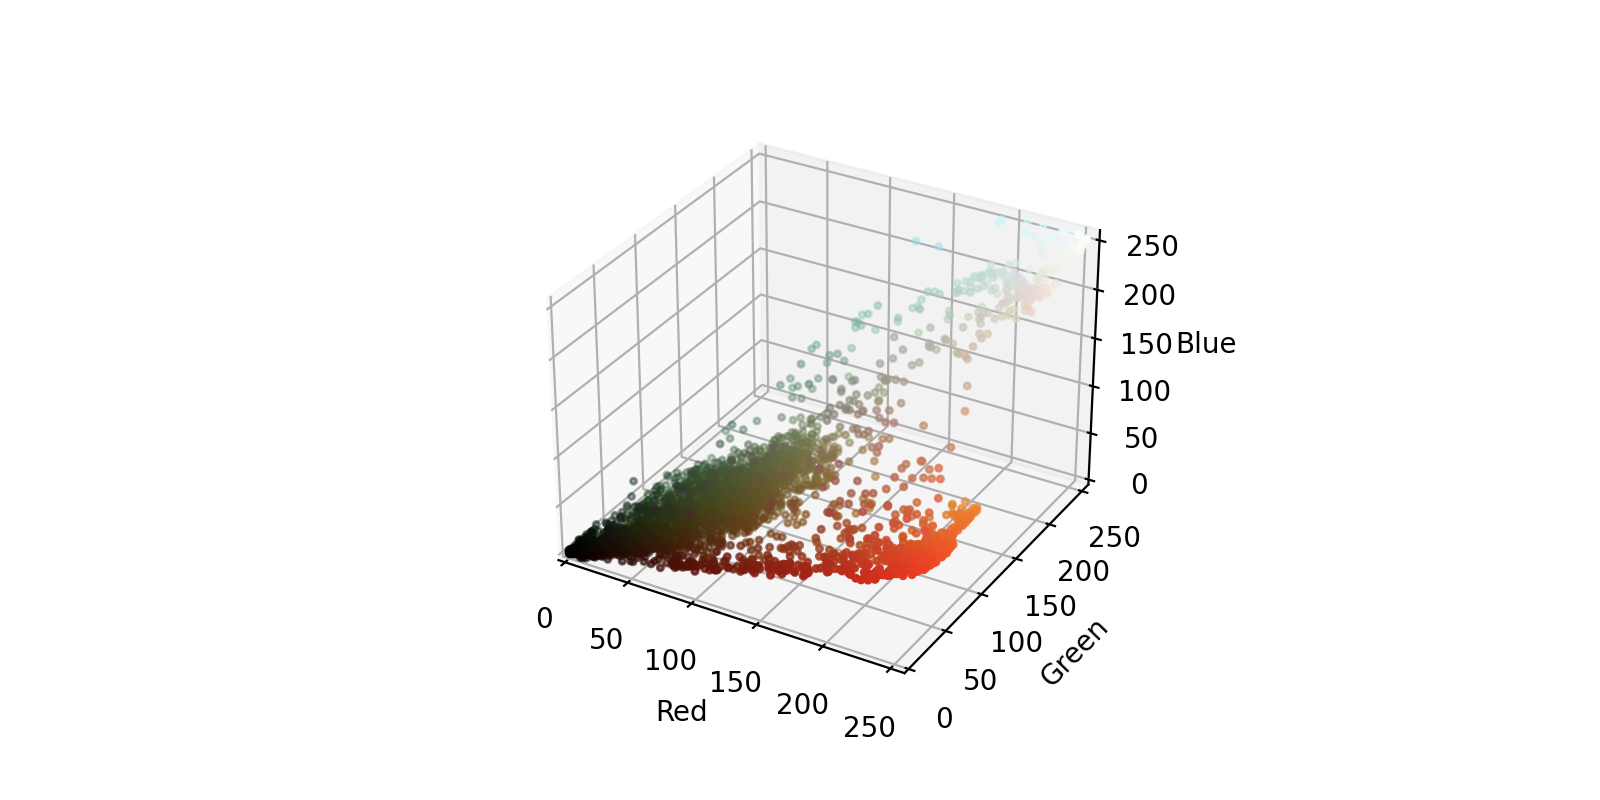

In [13]:
helpers.plot_points_3d(arr)

Looking at this plot, we can see many of the pixels are similar in color to the orange-red pixel we plotted previously. There are also some greenish-brown hues, some light blue hues, and some white hues. If we were asked to identify the dominant colors in the image, we could squint at the scatterplot above and identify the chief clusters of color.

As it turns out, this is exactly what computer vision packages do when they identify the dominant colors in an image. Let's see this in practice below:

<IPython.core.display.Javascript object>


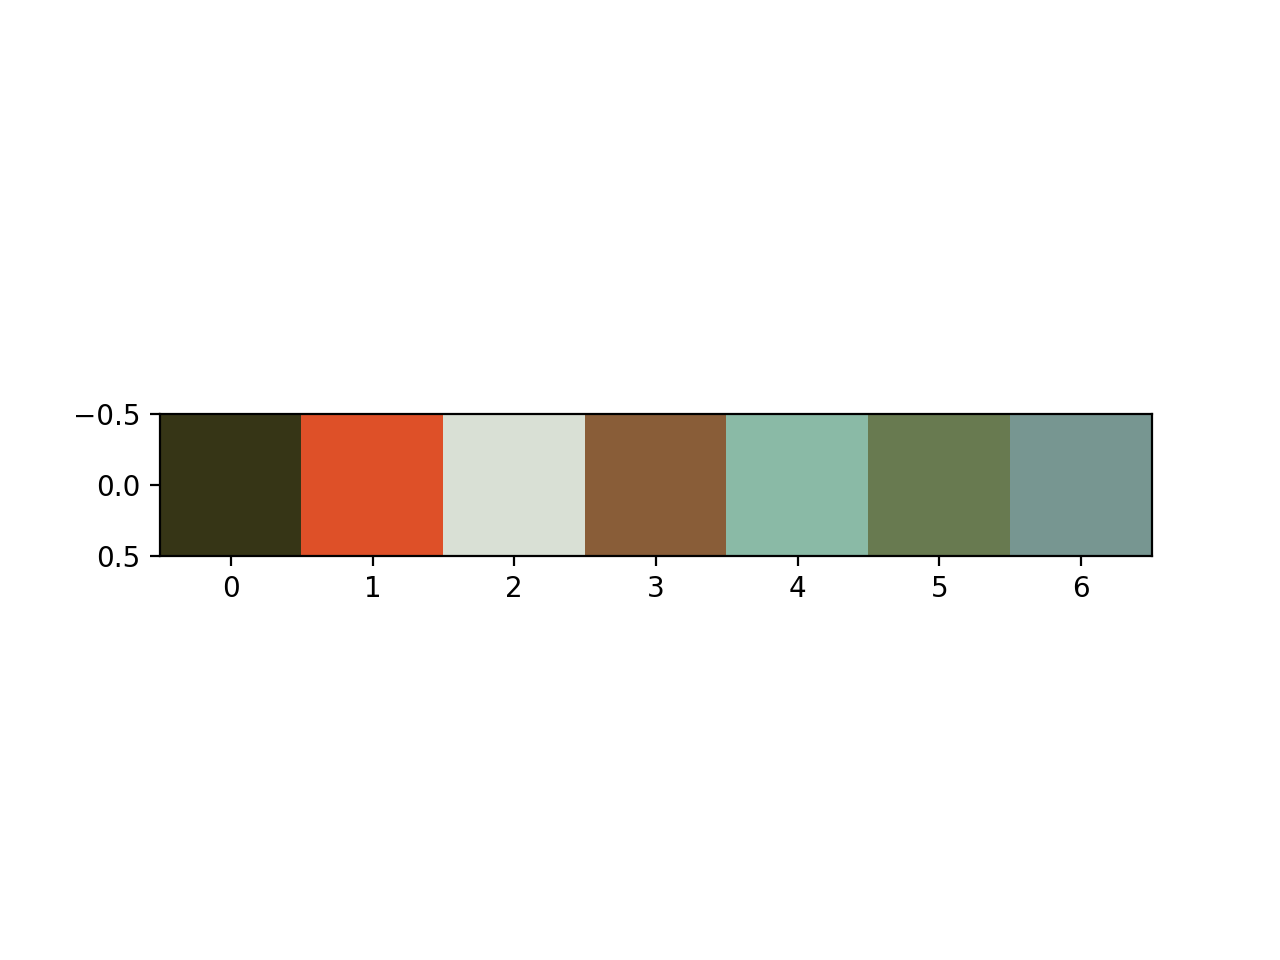

In [16]:
from colorthief import ColorThief

# identify the 7 colors that best represent the color palette in this image
palette = ColorThief('nemo.jpg').get_palette(color_count=7)

# create a new plot
plt.figure()

# show the palette
plt.imshow([palette])

How does ColorThief identify the representative colors in our image? There are a number of possible algorithms one can use, but a simple approach to this task is to take the scatterplot of pixels we looked at above and find the predominant clusters in that image. 

But how do we identify clusters in a scatterplot? For this task, we can use the "K-Means" clustering algorithm, which works as follows. Given a collection of points in a space, K-Means selects K "centroid" points randomly (colored green below), then assigns each non-centroid point to the centroid to which it's closest. Using these preliminary groupings, the next step is to find the geometric center of each group, using the same technique one would use to find the center of a square. These group centers become the new centroids, and again each point is assigned to the centroid to which it's closest. This process continues until centroid movement falls below some minimal movement threshold, after which the clustering is complete. Here’s a visual description of K-Means:

<img src='./images/kmeans.gif'>

If we start with the 3D scatterplot above and find the positions of 7 centroids, we end up with a collection of representative colors for our image!

<h2 style='color: green'>Reviewing Color Analysis</h2>

Let's practice extracting the representative colors from an image. See if you can use the ColorThief module just as we did above to identify 7 representative colors in turtle.jpg below:

<details>
  <summary>Solution</summary>
  We can identify these colors with the following lines of code:
    
  ```
  from colorthief import ColorThief

  # identify the 7 colors that best represent the color palette in this image
  palette = ColorThief('turtle.jpg').get_palette(color_count=7)

  # create a new plot
  plt.figure()

  # show the palette
  plt.imshow([palette])
  ```
</details>

## Comparing Color Palettes

In the passages above, we saw how to analyze the color palette in a single image. Let's now practice analyzing the colors in multiple images at once. 

To get started with this task, let's analyze the colors used in several paintings by Claude Monet:

In [25]:
import glob
import os

# populate a list of image files
files = sorted(glob.glob('data/Rene_Magritte-*.jpg'))

# print the list of files we'll analyze
files

['data/Rene_Magritte-0.jpg',
 'data/Rene_Magritte-1.jpg',
 'data/Rene_Magritte-10.jpg',
 'data/Rene_Magritte-11.jpg',
 'data/Rene_Magritte-12.jpg',
 'data/Rene_Magritte-13.jpg',
 'data/Rene_Magritte-14.jpg',
 'data/Rene_Magritte-15.jpg',
 'data/Rene_Magritte-16.jpg',
 'data/Rene_Magritte-17.jpg',
 'data/Rene_Magritte-18.jpg',
 'data/Rene_Magritte-19.jpg',
 'data/Rene_Magritte-2.jpg',
 'data/Rene_Magritte-3.jpg',
 'data/Rene_Magritte-4.jpg',
 'data/Rene_Magritte-5.jpg',
 'data/Rene_Magritte-6.jpg',
 'data/Rene_Magritte-7.jpg',
 'data/Rene_Magritte-8.jpg',
 'data/Rene_Magritte-9.jpg']

Let's examine a sample image from this list:

<IPython.core.display.Javascript object>


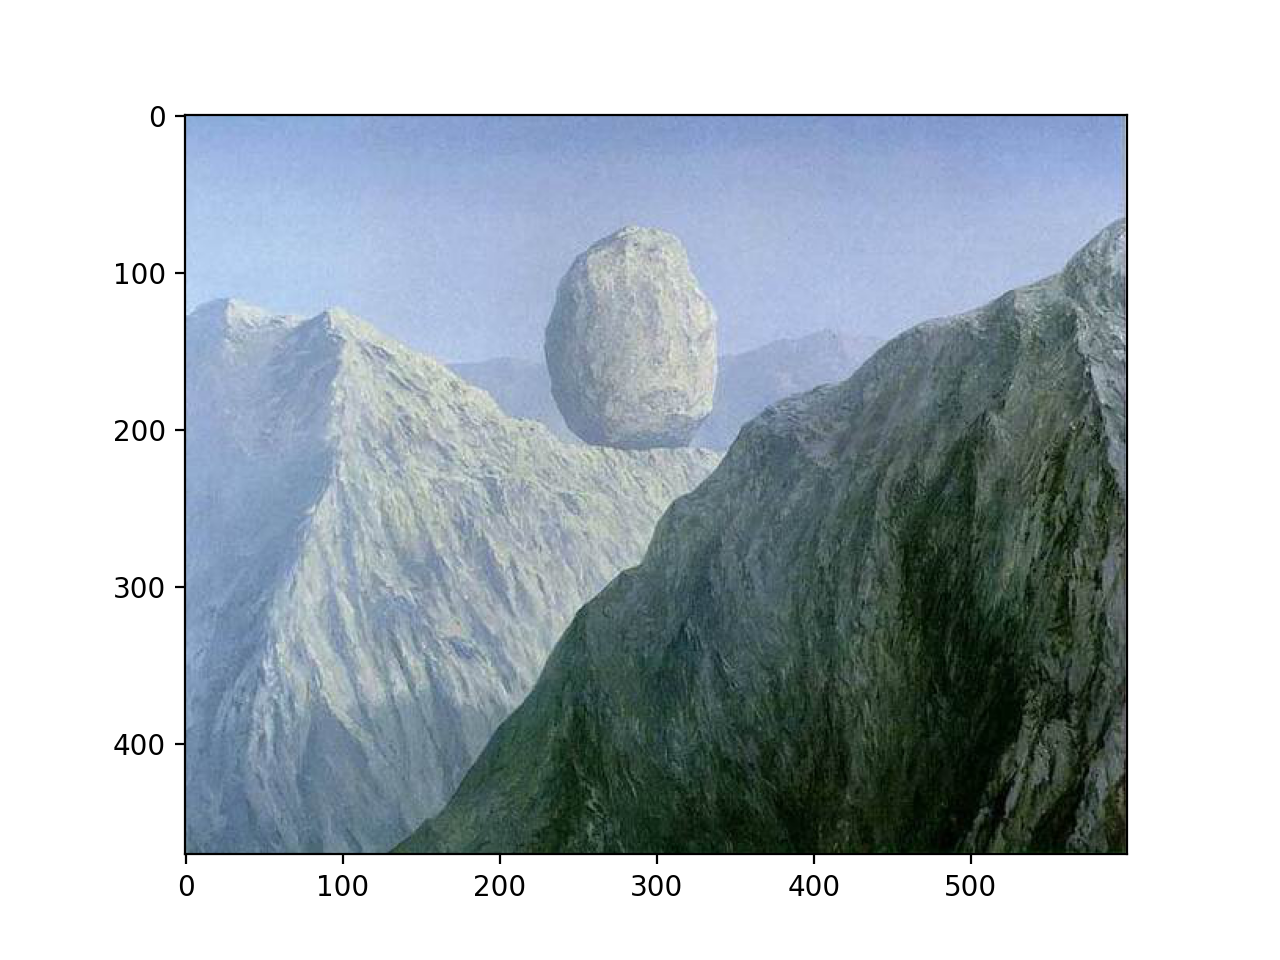

In [26]:
# get the first file in the list
file = files[0]

# read in the image
im = load_img(file)

# convert the image type to an array
arr = img_to_array(im).astype('uint8')

# create a new plot
plt.figure()

# plot the image
plt.imshow(arr)

As we know, we can extract representative colors for this image as follows:

<IPython.core.display.Javascript object>


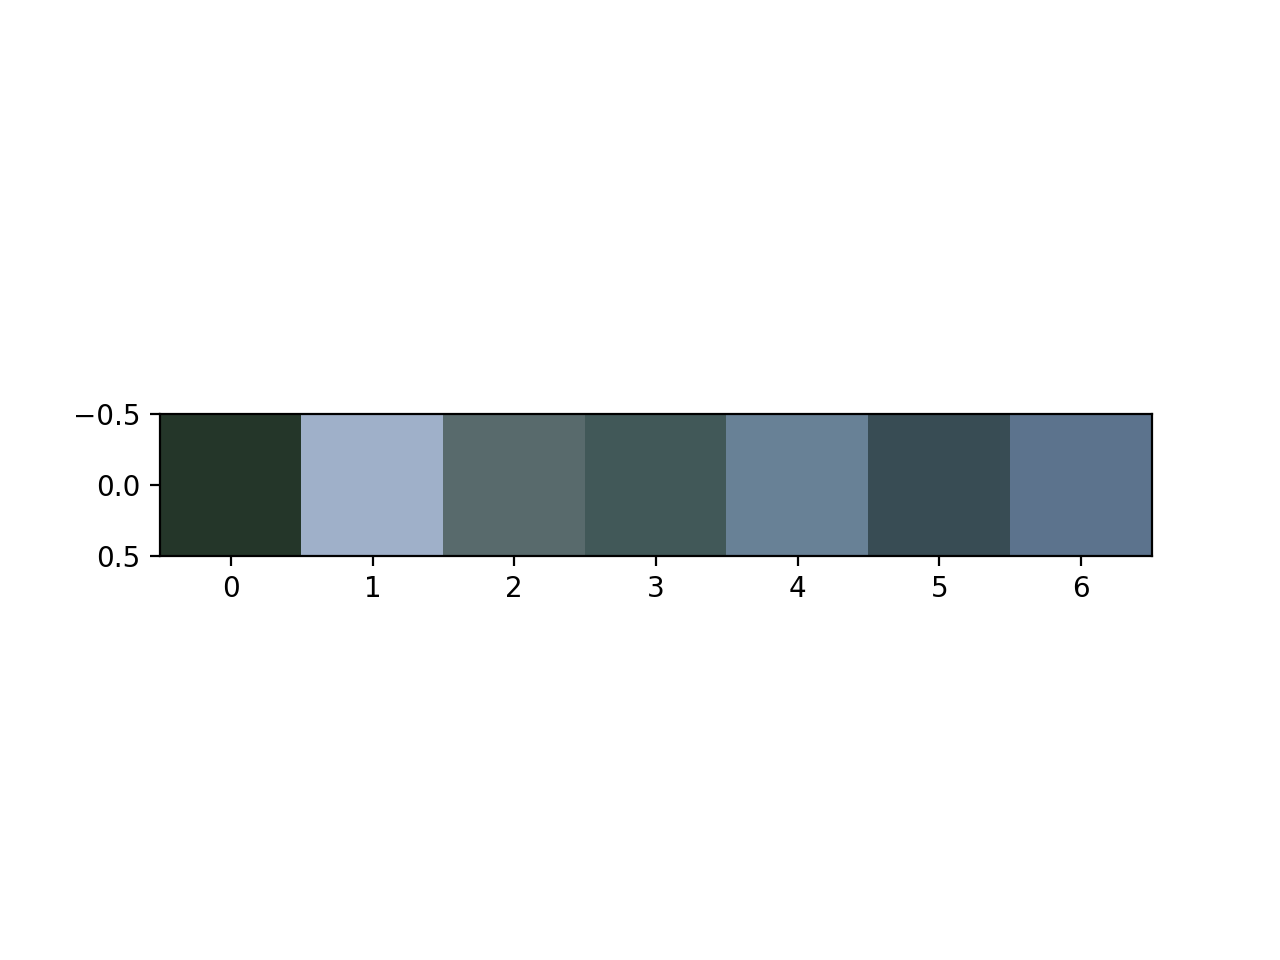

In [27]:
from colorthief import ColorThief

# identify the 7 colors that best represent the color palette in this image
palette = ColorThief(file).get_palette(color_count=7)

# create a new figure
plt.figure()

# show the extracted colors
plt.imshow([palette])

We can also sort these colors so they are organized according to the "roygbiv" spectrum:

<IPython.core.display.Javascript object>


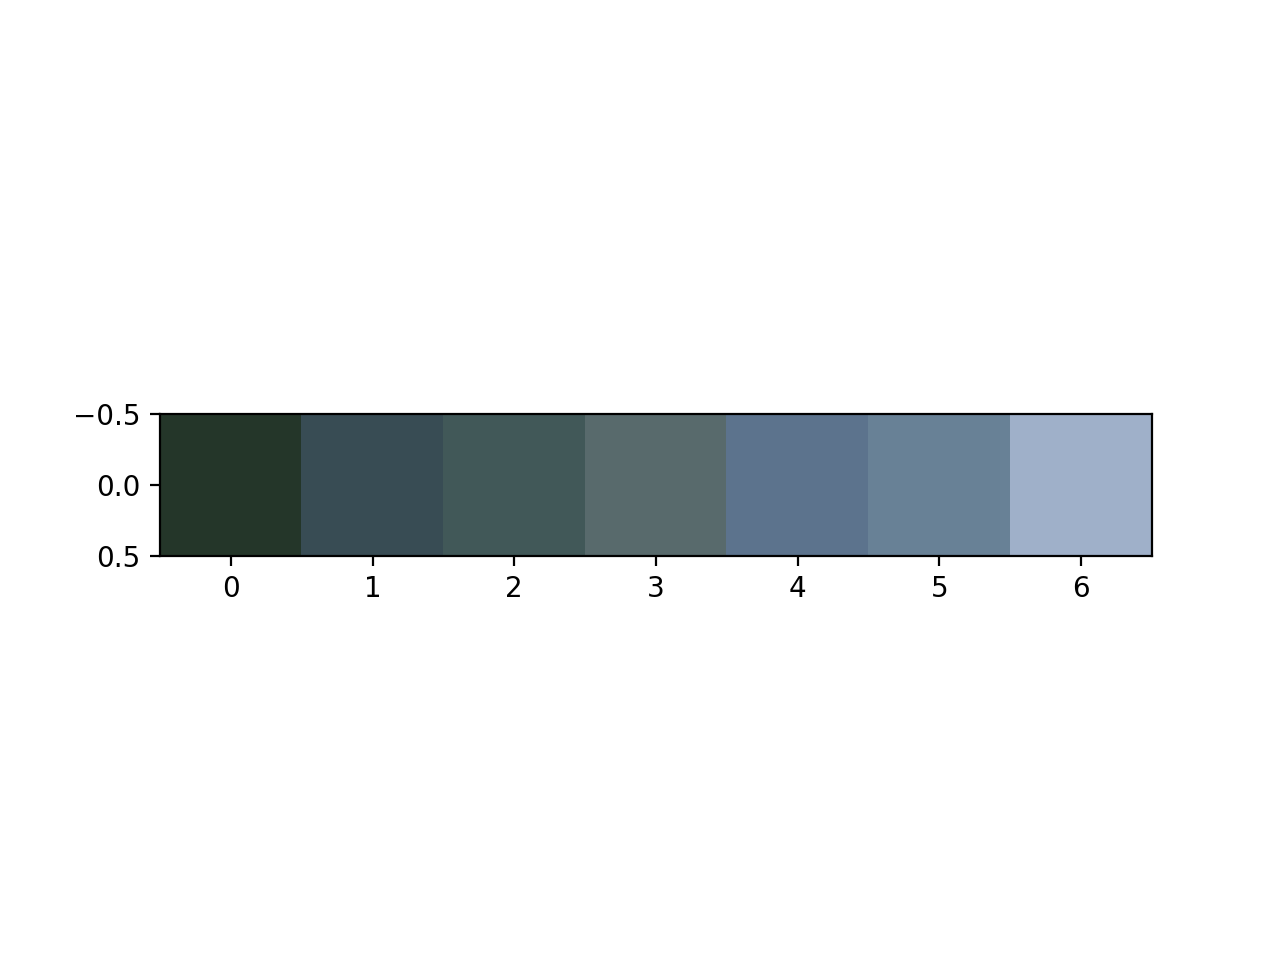

In [28]:
# sort the colors in this palette
palette.sort()

# create a new figure
plt.figure()

# show the extracted colors
plt.imshow([palette])

When seen in isolation, these sorted colors are not always perfectly intuitive, but when seen in the aggregate we can see that color sorting helps make some patterns easier to see. Let's see this in practice by analyzing the colors in each painting by Monet:

 * processed data/Rene_Magritte-0.jpg
 * processed data/Rene_Magritte-1.jpg
 * processed data/Rene_Magritte-10.jpg
 * processed data/Rene_Magritte-11.jpg
 * processed data/Rene_Magritte-12.jpg
 * processed data/Rene_Magritte-13.jpg
 * processed data/Rene_Magritte-14.jpg
 * processed data/Rene_Magritte-15.jpg
 * processed data/Rene_Magritte-16.jpg
 * processed data/Rene_Magritte-17.jpg
 * processed data/Rene_Magritte-18.jpg
 * processed data/Rene_Magritte-19.jpg
 * processed data/Rene_Magritte-2.jpg
 * processed data/Rene_Magritte-3.jpg
 * processed data/Rene_Magritte-4.jpg
 * processed data/Rene_Magritte-5.jpg
 * processed data/Rene_Magritte-6.jpg
 * processed data/Rene_Magritte-7.jpg
 * processed data/Rene_Magritte-8.jpg
 * processed data/Rene_Magritte-9.jpg


<IPython.core.display.Javascript object>


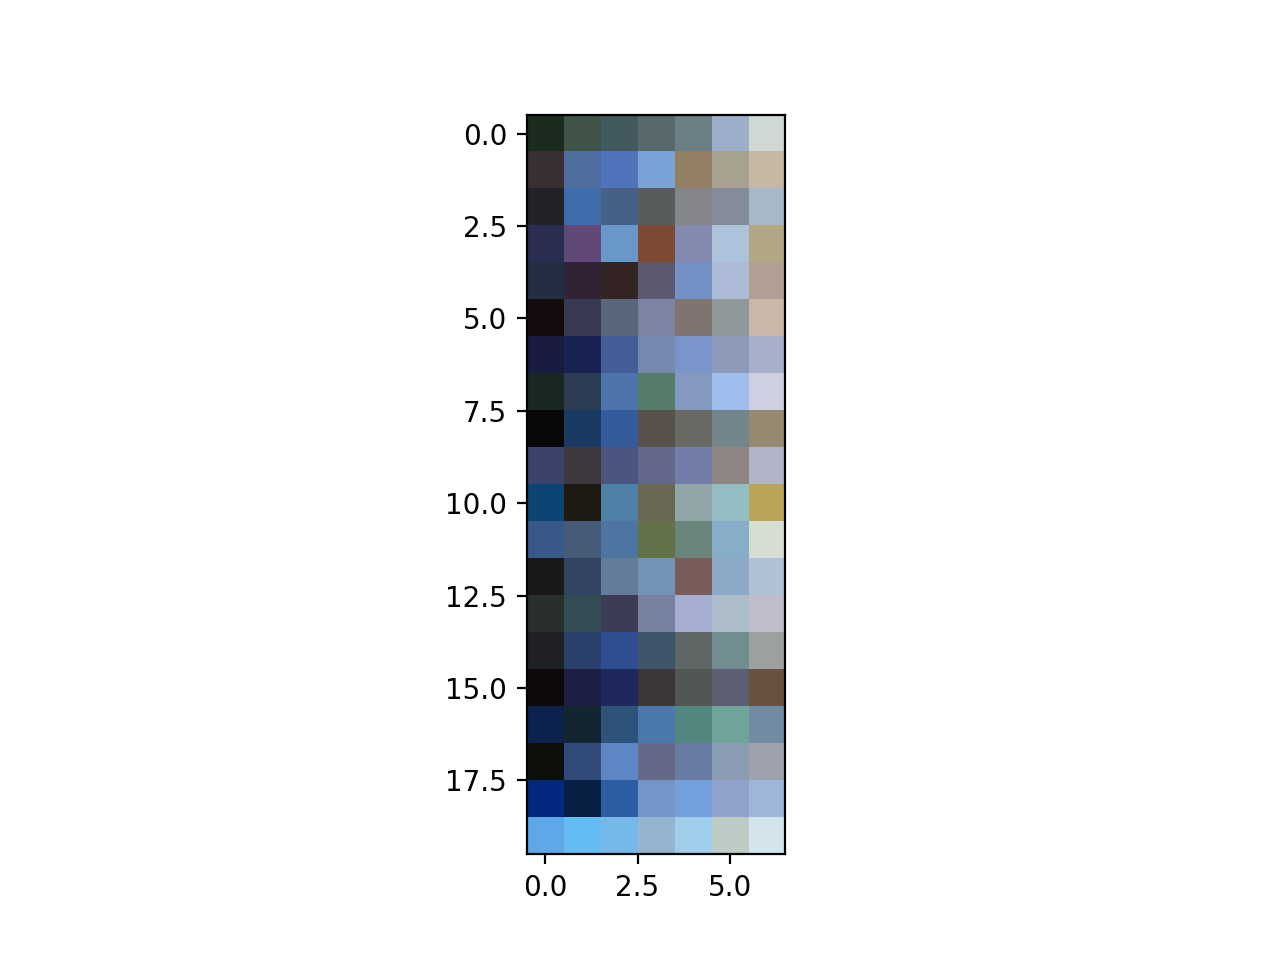

In [21]:
# create a list that will hold the colors for each painting
all_colors = []

# loop over each file
for file in files:
  
  # identify the 7 colors that best represent the color palette in this image
  palette = ColorThief(file).get_palette(color_count=7)
  
  # sort the palette as we did above
  palette.sort()
  
  # add this list of colors to the all_colors list
  all_colors.append(palette)
  
  # print a status update so we know how many files we've processed
  print(' * processed', file)
  
# create a new plot
plt.figure()

# plot all of the colors
plt.imshow(all_colors)

Awesome! We can see pretty quickly that many of the Magritte images in our dataset feature a pretty defined blue scale. Let's now analyze the paintings by all of the painters in our dataset to compare:

In [22]:
from collections import defaultdict

# initialize an empty list in which we'll store the color data for each artist
all_artist_colors = defaultdict(list)

# identify the list of files to process
files = glob.glob('data/*.jpg')

# loop over each file
for file in sorted(files):
  
  # identify the artist's name
  artist = file.split('/')[1].split('-')[0]
  
  # get the representative colors from this image
  palette = ColorThief(file).get_palette(color_count=6)
  
  # sort the palette as we did above
  palette.sort()
  
  # add this list of colors to the artist's colors
  all_artist_colors[artist].append(palette)
  
  # print a progress update
  print(' * processed', file)

 * processed data/Albrecht_Dürer-0.jpg
 * processed data/Albrecht_Dürer-1.jpg
 * processed data/Albrecht_Dürer-10.jpg
 * processed data/Albrecht_Dürer-11.jpg
 * processed data/Albrecht_Dürer-12.jpg
 * processed data/Albrecht_Dürer-13.jpg
 * processed data/Albrecht_Dürer-14.jpg
 * processed data/Albrecht_Dürer-15.jpg
 * processed data/Albrecht_Dürer-16.jpg
 * processed data/Albrecht_Dürer-17.jpg
 * processed data/Albrecht_Dürer-18.jpg
 * processed data/Albrecht_Dürer-19.jpg
 * processed data/Albrecht_Dürer-2.jpg
 * processed data/Albrecht_Dürer-3.jpg
 * processed data/Albrecht_Dürer-4.jpg
 * processed data/Albrecht_Dürer-5.jpg
 * processed data/Albrecht_Dürer-6.jpg
 * processed data/Albrecht_Dürer-7.jpg
 * processed data/Albrecht_Dürer-8.jpg
 * processed data/Albrecht_Dürer-9.jpg
 * processed data/Alfred_Sisley-0.jpg
 * processed data/Alfred_Sisley-1.jpg
 * processed data/Alfred_Sisley-10.jpg
 * processed data/Alfred_Sisley-11.jpg
 * processed data/Alfred_Sisley-12.j

 * processed data/Edgar_Degas-3.jpg
 * processed data/Edgar_Degas-4.jpg
 * processed data/Edgar_Degas-5.jpg
 * processed data/Edgar_Degas-6.jpg
 * processed data/Edgar_Degas-7.jpg
 * processed data/Edgar_Degas-8.jpg
 * processed data/Edgar_Degas-9.jpg
 * processed data/El_Greco-0.jpg
 * processed data/El_Greco-1.jpg
 * processed data/El_Greco-10.jpg
 * processed data/El_Greco-11.jpg
 * processed data/El_Greco-12.jpg
 * processed data/El_Greco-13.jpg
 * processed data/El_Greco-14.jpg
 * processed data/El_Greco-15.jpg
 * processed data/El_Greco-16.jpg
 * processed data/El_Greco-17.jpg
 * processed data/El_Greco-18.jpg
 * processed data/El_Greco-19.jpg
 * processed data/El_Greco-2.jpg
 * processed data/El_Greco-3.jpg
 * processed data/El_Greco-4.jpg
 * processed data/El_Greco-5.jpg
 * processed data/El_Greco-6.jpg
 * processed data/El_Greco-7.jpg
 * processed data/El_Greco-8.jpg
 * processed data/El_Greco-9.jpg
 * processed data/Francisco_Goya-0.jpg
 * processed data/Francisco_Goya-1.jpg


 * processed data/Leonardo_da_Vinci-9.jpg
 * processed data/Pablo_Picasso-0.jpg
 * processed data/Pablo_Picasso-1.jpg
 * processed data/Pablo_Picasso-10.jpg
 * processed data/Pablo_Picasso-11.jpg
 * processed data/Pablo_Picasso-12.jpg
 * processed data/Pablo_Picasso-13.jpg
 * processed data/Pablo_Picasso-14.jpg
 * processed data/Pablo_Picasso-15.jpg
 * processed data/Pablo_Picasso-16.jpg
 * processed data/Pablo_Picasso-17.jpg
 * processed data/Pablo_Picasso-18.jpg
 * processed data/Pablo_Picasso-19.jpg
 * processed data/Pablo_Picasso-2.jpg
 * processed data/Pablo_Picasso-3.jpg
 * processed data/Pablo_Picasso-4.jpg
 * processed data/Pablo_Picasso-5.jpg
 * processed data/Pablo_Picasso-6.jpg
 * processed data/Pablo_Picasso-7.jpg
 * processed data/Pablo_Picasso-8.jpg
 * processed data/Pablo_Picasso-9.jpg
 * processed data/Paul_Gauguin-0.jpg
 * processed data/Paul_Gauguin-1.jpg
 * processed data/Paul_Gauguin-10.jpg
 * processed data/Paul_Gauguin-11.jpg
 * processed data/Paul_Gauguin-12.jpg


 * processed data/Titian-2.jpg
 * processed data/Titian-3.jpg
 * processed data/Titian-4.jpg
 * processed data/Titian-5.jpg
 * processed data/Titian-6.jpg
 * processed data/Titian-7.jpg
 * processed data/Titian-8.jpg
 * processed data/Titian-9.jpg
 * processed data/Vasiliy_Kandinskiy-0.jpg
 * processed data/Vasiliy_Kandinskiy-1.jpg
 * processed data/Vasiliy_Kandinskiy-10.jpg
 * processed data/Vasiliy_Kandinskiy-11.jpg
 * processed data/Vasiliy_Kandinskiy-12.jpg
 * processed data/Vasiliy_Kandinskiy-13.jpg
 * processed data/Vasiliy_Kandinskiy-14.jpg
 * processed data/Vasiliy_Kandinskiy-15.jpg
 * processed data/Vasiliy_Kandinskiy-16.jpg
 * processed data/Vasiliy_Kandinskiy-17.jpg
 * processed data/Vasiliy_Kandinskiy-18.jpg
 * processed data/Vasiliy_Kandinskiy-19.jpg
 * processed data/Vasiliy_Kandinskiy-2.jpg
 * processed data/Vasiliy_Kandinskiy-3.jpg
 * processed data/Vasiliy_Kandinskiy-4.jpg
 * processed data/Vasiliy_Kandinskiy-5.jpg
 * processed data/Vasiliy_Kandinskiy-6.jpg
 * processe

<IPython.core.display.Javascript object>


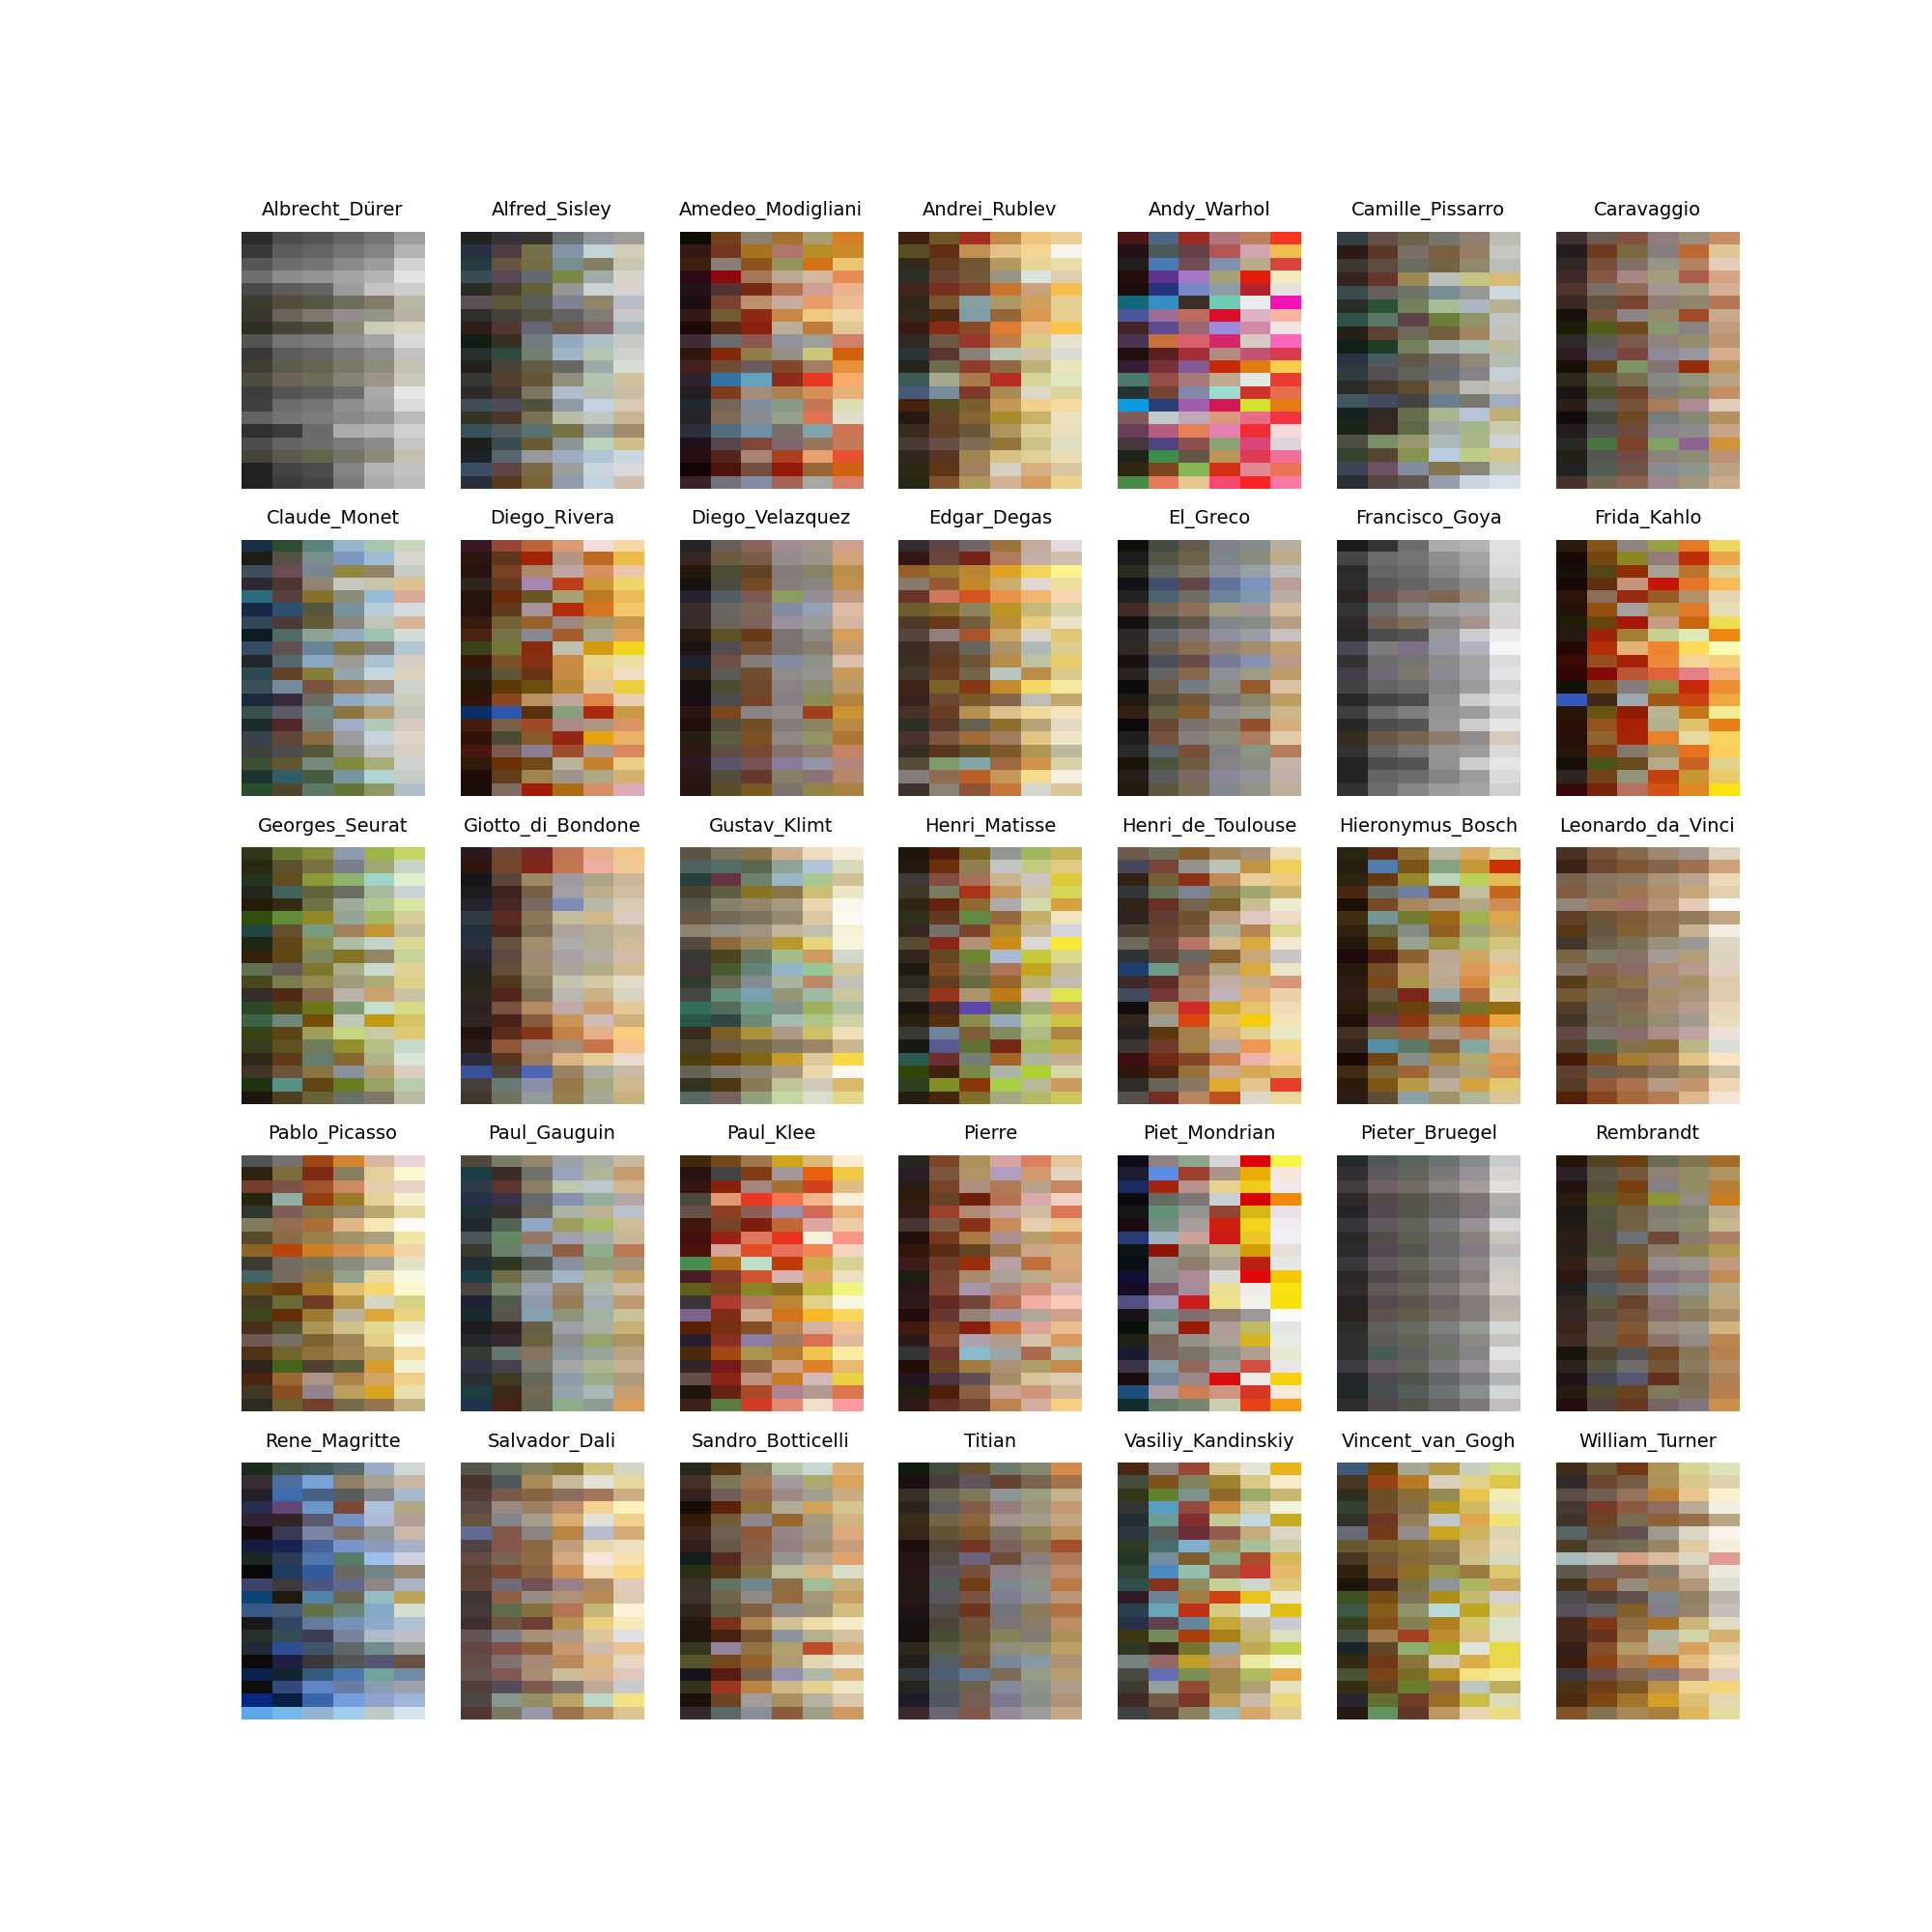

In [24]:
# initialize a plot that will contain 5 rows and 7 columns
fig, ax = plt.subplots(5, 7, figsize=(10,10))

# create a list of lists where sublists contain artists and their colorswatches
arist_color_pairs = list(all_artist_colors.items())

# create a counter variable that will keep track of which cell we are populating within the chart
index = 0
  
# loop over each row in the chart
for row in ax:
  
  # loop over each column in this row
  for col in row:
    
    # get the appropriate artist and color pair
    artist, colors = arist_color_pairs[index]
    
    # add this artist's colors to the current cell in the chart
    col.imshow(colors, interpolation='nearest', aspect='auto')
    
    # add this artist's name as the title in the current cell in the chart
    col.set_title(artist, fontsize=7)
    
    # remove the axes from this cell in the chart
    col.axis('off')
    
    # increase the index
    index += 1

It's a chart! Using just a few lines of Python code, we can create a beautiful chart of the representative palletes used by prominent artists throughout history. That's all it takes!

## Next Steps

In this workshop, we've seen how we can read images into memory, analyze the individual pixels within those images, identify the representative colors within an image, and compare the colors used across different images and different artists.

This is only an introduction to the art of color analysis, of course. There are many directions in which you might want to head next. Here are two possible next steps:

**Extracting images from digitized books**: All of the data we've used in this workshop has been cleanly prepared, but sometimes we want to analyze the images or figures that are embedded in a larger text document. To do so, you can explore the inner workings of simple tools like [**shears**](https://github.com/YaleDHLab/shears), or you could look into the far more sophisticated methods used by tools like [**dhSegment**](https://github.com/dhlab-epfl/dhSegment).

**Analyzing film data**: All of our data above was comprised of still images, but researchers are now working on processing film data! To get started with this field, check out the [**ffmpeg**](https://ffmpeg.org/) utility.